In [1]:
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
sys.path

['/home/.schramm/Documents/3d_retrieval',
 '/opt/anaconda3/lib/python37.zip',
 '/opt/anaconda3/lib/python3.7',
 '/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.7/site-packages',
 '/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/.schramm/.ipython',
 '/usr/local/lib/python2.7/dist-packages']

In [2]:
import create_dict
import torch
import os
import json
import utils
import numpy as np

# Clean Data

In [3]:
#folder_name = '/data2'
#create_dict.clean_obj(folder_name)

# Generate Dataset

In [29]:
input_folder = '/data'
suffix = '_test_gpu' #suffix will append data_trainxxxx.json
max_elements_per_class = 5
create_dict.create_dictionary(input_folder, max_elements_per_class, suffix)

TypeError: __init__() got an unexpected keyword argument 'collect_faces'

# Initialize Network

In [22]:
import SiameseNet

device = torch.device("cuda:0" if torch.cuda.torch.cuda.is_available() else "cpu")

batch_size = 2
net = SiameseNet.SiameseNet(batch_size)
suffix = '_gpu' # comment in if not coming from generating the dataset
path_to_params = "models/allClasses500_300epochs_m1_LR1e5.pt" # if file does not exist or is empty it starts from untrained and later saves to the file

# shift to GPU if available

net.to(device)
working_dir = os.getcwd()
data_dir_train = os.path.join(working_dir, 'data_train'+suffix+'.json')
data_dir_val = os.path.join(working_dir, 'data_val'+suffix+'.json')
class_dir = os.path.join(working_dir, 'class_dict'+suffix+'.json')

if os.path.isfile(path_to_params):
    if os.stat(path_to_params).st_size != 0:
        net.load_state_dict(torch.load(path_to_params))  #Loads pretrained net if file exists and if not empty
else:
    open(path_to_params, "x") #Creates parameter file if it does not exist

In [23]:
device

device(type='cuda', index=0)

# Train Network

In [16]:
#training parameters

writer_suffix = 'testing'
margin = 0.5
num_epochs = 1
print_batch = 1
lr = 0.0001



In [17]:
net = SiameseNet.train(net, num_epochs, margin, lr, print_batch, 
                       data_dir_train, data_dir_val, writer_suffix, path_to_params, working_dir)

218 train triplets generated -> return dict
Loaded 5032 word vectors.
Number of training triplets: 218
[1,     2] loss: 0.924
[1,     3] loss: 0.618
[1,     4] loss: 0.736
[1,     5] loss: 1.110
[1,     6] loss: 0.937
[1,     7] loss: 1.230
[1,     8] loss: 1.623
[1,     9] loss: 0.656
[1,    10] loss: 0.249
[1,    11] loss: 1.041
[1,    12] loss: 0.854
[1,    13] loss: 1.367
[1,    14] loss: 0.669
[1,    15] loss: 0.753
[1,    16] loss: 0.547
[1,    17] loss: 0.710
[1,    18] loss: 0.249
[1,    19] loss: 0.410
[1,    20] loss: 0.805
[1,    21] loss: 0.288
[1,    22] loss: 0.517
[1,    23] loss: 0.483
[1,    24] loss: 0.584
[1,    25] loss: 0.891
[1,    26] loss: 0.242
[1,    27] loss: 0.727
[1,    28] loss: 0.426
[1,    29] loss: 0.250
[1,    30] loss: 0.247
[1,    31] loss: 0.861
[1,    32] loss: 0.376
[1,    33] loss: 1.039
[1,    34] loss: 0.245
[1,    35] loss: 0.215
[1,    36] loss: 0.250
[1,    37] loss: 0.290
[1,    38] loss: 0.403
[1,    39] loss: 0.249
[1,    40] loss: 0.824


# Validation

In [24]:
margin = 0.5
writer_suffix = 'Val'
SiameseNet.val(net, margin, data_dir_val, writer_suffix, working_dir, class_dir)

27 val triplets generated
Loaded 5032 word vectors.
Number of validation triplets: 27
Doing Evaluation
0 [26  0 25  3 10]
1 [ 4 26 13 11 20]
2 [25  0 26  3 10]
3 [26  0  4 25  3]
4 [ 4 26  0 25  3]
5 [ 0 25 26  3 10]
6 [26  0 25  3 10]
7 [26  0 25  3  4]
8 [ 4 26 20  0 11]
9 [25  0 26  3 10]
10 [26  0 25  3  4]
11 [ 4 26 11 13 20]
12 [26 20  0 23 25]
13 [ 4 26 13 11 20]
14 [13  4 11 20 26]
15 [26  0  4 25  3]
16 [ 4 26  0 20 25]
17 [ 4 26 13 11 20]
18 [26  0 25  3 10]
19 [26  4  0 25  3]
20 [26  4  0 25  3]
21 [26  0 25  3  4]
22 [ 4 26  0 20 11]
23 [26  0  4 20 25]
24 [26 20 11 13  4]
25 [26  0 25  3 10]
26 [26  4  0 25  3]
precision: 0.25925925925925924
recall: 0.25925925925925924
fscore: 0.25925925925925924
NDCG: 0.15042986339425374


# Retrieval

In [25]:
y_true, y_pred, ids, shape, description = SiameseNet.retrieval(net, data_dir_val, working_dir, print_nn=False)

27 val triplets generated
Loaded 5032 word vectors.
Number of validation triplets: 13


0 ID: 5ce6aa474b597edb4d3a0a56bdd58a7d  Descr.: this is a gray and green desk cabinet with drawers
1 ID: ef1152b1660592d413f0924ccc9628e5  Descr.: cushion chair and green color of the object
2 ID: 6f392c57518e225e7c54607407af3ab6  Descr.: this is a gray filing cabinet with pull out drawers


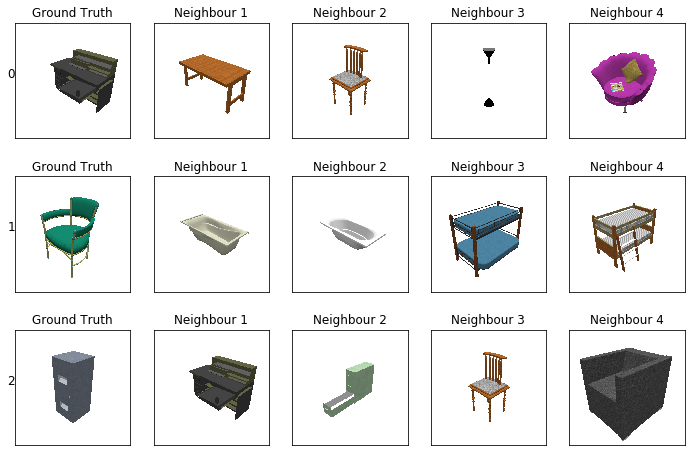

In [27]:
num_KNN = 4
max_show = 3
utils.retrieve_images(y_pred, ids, data_dir_val, class_dir, num_KNN, max_show, shuffle=True)

In [28]:
sentence = 'This is a black chair'
#sentence = input("Enter sentence")
num_KNN = 4
utils.retrieve_one_sentence(net, data_dir_val, working_dir, sentence, class_dir, num_KNN)


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same